<h3>Generadores aleatorios</h3>
<p>Supongamos que queremos programar una funci&oacute;n como $random()$ que es uniforme en el intervalo $[0,1]$. Los n&uacute;meros reales en el intervalo los veremos, en el ordenador, como decimales, por ejemplo, con diez cifras. Si los multiplicamos por $10^{10}$&nbsp; los podemos ver como enteros en el intervalo $[0,10^{10}]$ , o como clases de restos m&oacute;dulo $n:=10^{10}+1.$</p>
<p>Los generadores (pseudo-)aleatorios funcionan, $grosso$&nbsp; $modo$, iterando una funci&oacute;n adecuada $f$ de $\mathbb{Z}_n$, con $n$ muy grande,&nbsp; en s&iacute; mismo. El primer n&uacute;mero aleatorio que se genera, digamos $x_0$ se llama la semilla, y salvo que indiquemos expl&iacute;citamente lo contrario, el ordenador la genera cada vez usando, por ejemplo, el reloj interno de la m&aacute;quina.</p>
<p>Los siguientes se obtienen iterando la funci&oacute;n $f$, es decir, mediante $x_n:=f^n(x_0)$. Es claro que este proceso no tiene de "aleatorio" sino la elecci&oacute;n de la semilla, el resto es completamente "determinista".</p>
<p>Cuando un generador, por ejemplo en $x_{m_0}$,&nbsp; vuelve a un valor ya visitado, es decir, $x_{m_0}=x_{n_0}$ con $n_0 <m_0$ se produce un per&iacute;odo: a partir de $m_0$ los n&uacute;meros generados son los mismos que se generaron a partir de $n_0$, y ya no sirven para nada &uacute;til. Los buenos generadores son los que tienen per&iacute;odos de longitud enormemente grande y que adem&aacute;s visitan casi todos los elementos de $\mathbb{Z}_n$ antes de caer en un per&iacute;odo.</p>
<p>Si fijamos expl&iacute;citamente la semilla, los resultados son id&eacute;nticos, cosa que por supuesto no ocurre si dejamos que SAGE elija la semilla usando el hardware de la m&aacute;quina.</p>

In [1]:
set_random_seed(2^17); [randint(0,1) for n in srange(10^5)].count(1)

49858

In [2]:
set_random_seed(2^17); [randint(0,1) for n in srange(10^5)].count(1)

49858

In [3]:
[randint(0,1) for n in srange(10^5)].count(1)

50027

<h3>Per&iacute;odo</h3>
<p>La instrucci&oacute;n $random()$ genera n&uacute;meros en el intervalo $[0,1]$ de manera (aproximadamente) uniforme: la frecuencia con que el resultado en $N$ repeticiones pertenece al subintervalo $[a,b]$ debe ser muy pr&oacute;xima a $b-a$. Una manera f&aacute;cil de comenzar a estudiar la calidad de los generadores es, simplemente, comprobar si esta propiedad de uniformidad se mantiene cuando $N$ crece. En general, se utilizan m&eacute;todos *estad&iacute;sticos*, los mismos que sirven para estudiar muestras de datos obtenidas del mundo real, para estudiar la uniformidad de los n&uacute;meros suministrados por distintos generadores (pseudo-)aleatorios.</p>
<p>Uno de los primeros generadores de n&uacute;meros aleatorios fu&eacute; propuesto por von Neumann, puedes leer la descripci&oacute;n en&nbsp; <a href="http://en.wikipedia.org/wiki/Middle-square_method" target="_blank">wiki</a>, y vamos a estudiarlo un poco.</p>
<p>&nbsp;</p>

In [2]:
def vonneumann(L_digits):
    n = len(L_digits)
    if n%2 == 1:
        return "La semilla debe tener un numero par de digitos"
    else:
        L2 = (ZZ(L_digits,10)^2).digits(base=10,padto=2*n)
        L3 = L2[n//2:(3*n)//2]
        L3.reverse()
        return L3

<p>La funci&oacute;n debe aplicarse a la lista de d&iacute;gitos de $x_n$ para obtener la lista de d&iacute;gitos de $x_{n+1}.$</p>

In [5]:
vonneumann(vonneumann([4,3,2,1]))

[2, 0, 0, 6]

In [6]:
def periodo_vn(L_digits):
    L = []
    while L_digits not in L:
        L.append(L_digits)
        L_digits= vonneumann(L_digits)
    return len(L)

In [7]:
periodo_vn([2,1])

17

In [8]:
time periodo_vn((12345678).digits(base=10))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.05 ms


97

In [9]:
def generador_vn(L_digits,M):
    n = len(L_digits)
    L = [L_digits]
    for int in xrange(M):
        L.append(vonneumann(L[-1:][0]))
    L1 = [(ZZ(x,10)/10^n).n() for x in L]
    return L1

In [10]:
print generador_vn((12).digits(base=10),100)

[0.120000000000000, 0.410000000000000, 0.860000000000000, 0.930000000000000, 0.460000000000000, 0.110000000000000, 0.210000000000000, 0.440000000000000, 0.390000000000000, 0.250000000000000, 0.260000000000000, 0.760000000000000, 0.770000000000000, 0.290000000000000, 0.480000000000000, 0.0300000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.00000000

In [12]:
def periodos():
    dict = {}
    for n in srange(1000,10000):
        if n%1000 == 0:
            print "mil más"
        per = periodo_vn((n).digits(base=10))
        if not dict.has_key(per):
            dict[per]=1
        else:
            dict[per] += 1
    return dict

In [13]:
%time print periodos()

mil más
mil más
mil más
mil más
mil más
mil más
mil más
mil más
mil más
{2: 10, 3: 14, 4: 69, 5: 45, 6: 81, 7: 69, 8: 114, 9: 112, 10: 149, 11: 142, 12: 147, 13: 148, 14: 147, 15: 137, 16: 145, 17: 162, 18: 170, 19: 182, 20: 198, 21: 212, 22: 219, 23: 181, 24: 197, 25: 190, 26: 179, 27: 167, 28: 172, 29: 159, 30: 135, 31: 136, 32: 125, 33: 111, 34: 121, 35: 111, 36: 103, 37: 97, 38: 97, 39: 85, 40: 79, 41: 80, 42: 69, 43: 61, 44: 70, 45: 118, 46: 130, 47: 123, 48: 147, 49: 127, 50: 122, 51: 142, 52: 144, 53: 137, 54: 142, 55: 121, 56: 109, 57: 98, 58: 85, 59: 83, 60: 80, 61: 69, 62: 63, 63: 54, 64: 53, 65: 45, 66: 56, 67: 51, 68: 47, 69: 44, 70: 55, 71: 37, 72: 33, 73: 27, 74: 23, 75: 20, 76: 21, 77: 24, 78: 21, 79: 19, 80: 18, 81: 22, 82: 19, 83: 23, 84: 36, 85: 33, 86: 33, 87: 28, 88: 37, 89: 38, 90: 42, 91: 39, 92: 46, 93: 46, 94: 59, 95: 46, 96: 36, 97: 44, 98: 55, 99: 40, 100: 32, 101: 27, 102: 23, 103: 23, 104: 23, 105: 12, 106: 9, 107: 7, 108: 6, 109: 5, 110: 6, 111: 2, 112: 2, 

<h3>3. Histogramas</h3>

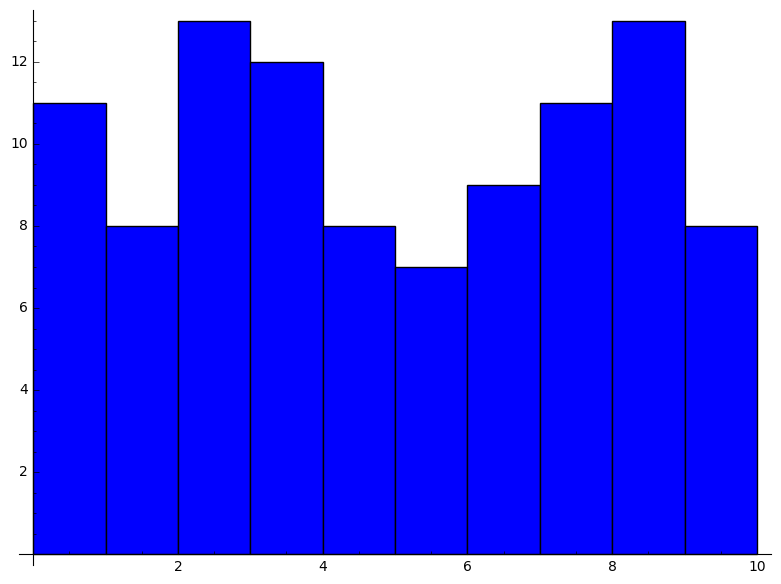

In [14]:
L = 10
T = 100
frecuencias = [0]*L
for j in range(T):
     k = randint(0,L-1)
     frecuencias[k] += 1
bar_chart(frecuencias,width=1).show(ymin=0)

In [15]:
def calc_frec(N,l):
    L = l*[0]
    for int in xrange(N):
        x = random()
        n = floor(x*l)
        L[n] += 1
    return L

In [16]:
calc_frec(1000,10)

[112, 108, 95, 90, 81, 123, 97, 103, 87, 104]

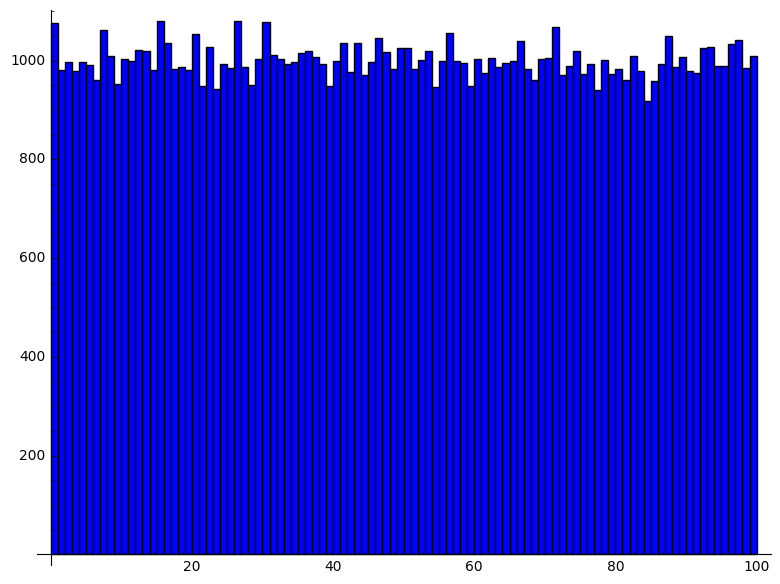

In [17]:
bar_chart(calc_frec(100000,100),width=1).show(ymin=0)

In [18]:
def error_porcen(N,l):
    L = l*[0]
    for int in xrange(N):
        x = random()
        n = floor(x*l)
        L[n] += 1
    L1 = [(((x-(N/l))*l/N).n()) for x in L]
    return L1

In [19]:
set_random_seed(2^17);calc_frec(1000,10);set_random_seed(2^17);error_porcen(1000,10)

[0.0700000000000000,
 -0.0200000000000000,
 0.0700000000000000,
 -0.0300000000000000,
 0.0600000000000000,
 0.0400000000000000,
 0.0400000000000000,
 -0.0800000000000000,
 -0.160000000000000,
 0.0100000000000000]

In [20]:
set_random_seed(2^17);error_porcen(10000,10)

[0.0430000000000000,
 0.00300000000000000,
 0.0450000000000000,
 0.00400000000000000,
 -0.0340000000000000,
 -0.0420000000000000,
 0.0120000000000000,
 -0.0420000000000000,
 0.0150000000000000,
 -0.00400000000000000]

In [21]:
set_random_seed(2^17);error_porcen(100000,10)

[-0.00270000000000000,
 -0.00600000000000000,
 0.0356000000000000,
 0.00170000000000000,
 -0.0144000000000000,
 -0.00620000000000000,
 0.00550000000000000,
 0.00260000000000000,
 -0.0114000000000000,
 -0.00470000000000000]

In [22]:
set_random_seed(2^17);error_porcen(1000000,10)

[0.00187000000000000,
 -0.00301000000000000,
 -0.000430000000000000,
 0.00455000000000000,
 -0.00181000000000000,
 0.00157000000000000,
 0.00120000000000000,
 0.00133000000000000,
 -0.00562000000000000,
 0.000350000000000000]

<p>Parece que los errores porcentuales van decreciendo al crecer $N$, la cantidad de n&uacute;meros aleatorios que usamos.</p>
<h3>4. Histogramas del generador de von Neumann</h3>

In [23]:
def calc_frec_vn(N,l,semilla):
    L = l*[0]
    L1 = generador_vn(semilla.digits(base=10),N)
    for int in xrange(N):
        n = floor(L1[int]*l)
        L[n] += 1
    return L

In [24]:
calc_frec_vn(10000,10,123456)

[9704, 25, 38, 37, 33, 33, 36, 23, 39, 32]

In [25]:
calc_frec_vn(10000,10,3567831934)

[998, 1018, 981, 1013, 1037, 1028, 966, 1017, 988, 954]

In [26]:
calc_frec_vn(100000,10,3567831934)

[10171, 9950, 9869, 9941, 10056, 10052, 10077, 9921, 10049, 9914]

In [27]:
calc_frec_vn(1000000,10,3567831934)

[101800, 98924, 99262, 98175, 101033, 101045, 101362, 98425, 100170, 99804]

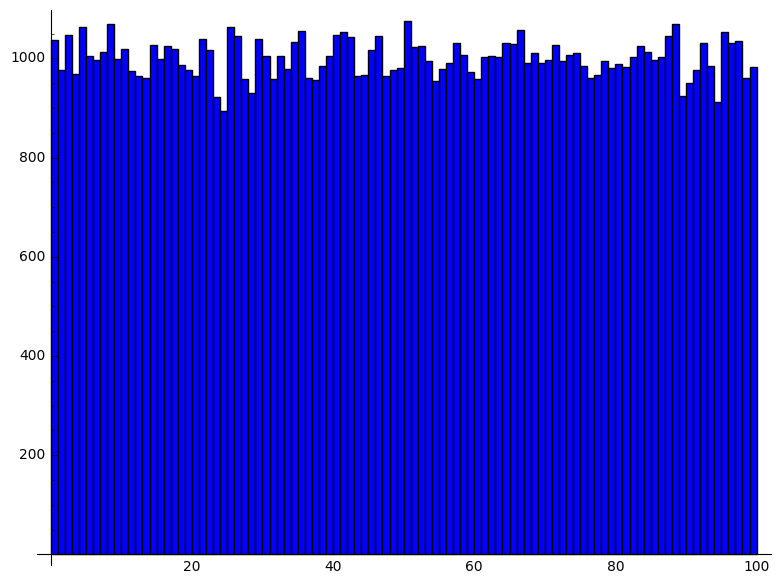

In [28]:
bar_chart(calc_frec_vn(100000,100,3567831934),width=1).show(ymin=0)

In [29]:
periodo_vn((3567831934).digits(base=10))

76977

<h3>6. Ejercicios</h3>
<ol>
<li><p>Discutir, usando los histogramas y los errores porcentuales,&nbsp; la mala calidad del generador de von Neumann comparado con el que tiene Sage por defecto, que se llama "Mersenne Twister" y est&aacute; considerado el mejor generador de n&uacute;meros (pseudo-)aleatorios para uso general. La implementaci&oacute;n estandar del Mersenne Twister produce enteros aleatorios de 32 bits con un per&iacute;odo&nbsp; de longitud 2<sup>19937</sup>&nbsp;&minus;&nbsp;1. </p>
<p> Los generadores modernos, como éste, utilizan funciones cuyos valores  dependen de un cierto número $k$ de valores anteriores, es decir, $x_n=F(x_{n-1},\dots,x_{n-k}).$
Puedes consultar la Wikipedia si te interesa conocer m&aacute;s detalles.</p> </li>
<li>Un problema de los generadores aleatorios son las llamadas "correlaciones". Decimos que el generador produce "n&uacute;meros autocorrelados" si, por ejemplo, el que ocupa la posici&oacute;n $n$ "influye demasiado"en el que ocupa la $n+1$, d&oacute;nde esta "influencia" hay que entenderla en sentido estad&iacute;stico. Las autocorrelaciones se pueden visualizar mediante un diagrama que represente una gran cantidad de puntos en el cuadrado $[0,1]\times [0,1]$ con coordenadas $(x_n,x_{n+1})$, cada punto debe venir dado por un circulito de radio muy peque&ntilde;o (por ejemplo, 1mm) con centro en el punto. Las autocorrelaciones, es decir, la "influencia"de cada n&uacute;mero aleatorio en el siguiente se ven como bandas de puntos en el cuadrado bien distinguibles a simple vista.&nbsp; Implementar este proceso, primero generando una lista de pares que van a ser las coordenadas de los puntos, y luego averiguando c&oacute;mo representar los puntos en el cuadrado unidad. Aplica esta idea al generador de von Neumann. </li>

<li>Durante bastante tiempo se utilizó en los ordenadores el generador de números pseudoaleatorios conocido como RANDU, que se define utilizando la transformación   $x_{i+1} :=(65539\cdot x_i)\%2^{31}$  con los  $x_i$ números enteros. Los números aleatorios que genera RANDU son decimales  $y_i$  del intervalo  $[0,1]$, que se obtienen dividiendo los enteros  $x_i$ entre  $2^{31}$. Si queremos  $N$  números aleatorios empezamos con  una   semilla entera  $x_0$,   iteramos la transformación  $N−1$  veces, y una vez obtenidos los  $N$  valores   $x_j$ dividimos cada uno entre  $2^{31}$.  Esta conversión de enteros a decimales conviene hacerla usando  $round(y,10)$  para redondear el decimal  $y$  a diez cifras decimales. 
Un generador tan simple no puede ser muy bueno, y en este ejercicio vamos a considerar esta cuestión.
<ol>
<li>Define las funciones necesarias para implementar RANDU en SAGE. </li>

<li>Genera una lista  $L$ con  $10^6$ números aleatorios decimales  $y_j$,  del intervalo  $[0,1]$,  comenzando con la semilla entera  $x_0:=1638303916$, es decir, con  $y_0=1638303916/2^{31}$, y NO LA IMPRIMAS en la pantalla.</li>
<li>Produce un histograma de los datos de la lista  $L$,  con  $100$  barras. ¿Tiene un aspecto uniforme?</li>

<li>Produce una lista  $L1$  de  $10^6$  tripletas de decimales aleatorios   $(y_i,y_{i+1},y_{i+2})$ , con el primero  $y_i$  elegido aleatorialemte mediante el generador de Sage, y los otros dos obtenidos a partir de él usando   RANDU.  Selecciona las tripletas de  $L1$  tales que  $0.50≤y_{i+1}≤0.51$, y produce la lista  $L2$  de duplas  $(y_i,y_i+2)$  correspondientes a las tripletas seleccionadas (es decir, aquellas tales que  $y_{i+1}$ cumple la condición). Representa gráficamente los datos contenidos en la lista  $L2$  y discute las conclusiones que se pueden obtener sobre la aleatoriedad de RANDU. </li></ol>
</li>





</ol>

In [23]:
def formarTuplas(lista):
    lTuplas=[]
    preitem=lista[0]
    for item in lista[1:]:
        lTuplas.append((ZZ(preitem, 10), ZZ(item, 10)))
        preitem=item
    return lTuplas
        
def vonneumann(L_digits):
    n = len(L_digits)
    if n%2 == 1:
        return "La semilla debe tener un numero par de digitos"
    else:
        L2 = (ZZ(L_digits,10)^2).digits(base=10,padto=2*n)
        L3 = L2[n//2:(3*n)//2]
        L3.reverse()
        return L3
    
def TuplasVonnNeumann(N, seed):
    L=[]
    for muda in srange(N):
        seed=vonneumann(seed)
        L.append(seed)
    return formarTuplas(L)

    

In [27]:
T=TuplasVonnNeumann(1000, [4, 7, 7, 2])

In [28]:
show(T)

[(596, 2553),
 (2553, 8715),
 (8715, 2159),
 (2159, 2166),
 (2166, 5196),
 (5196, 4899),
 (4899, 2000),
 (2000, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 

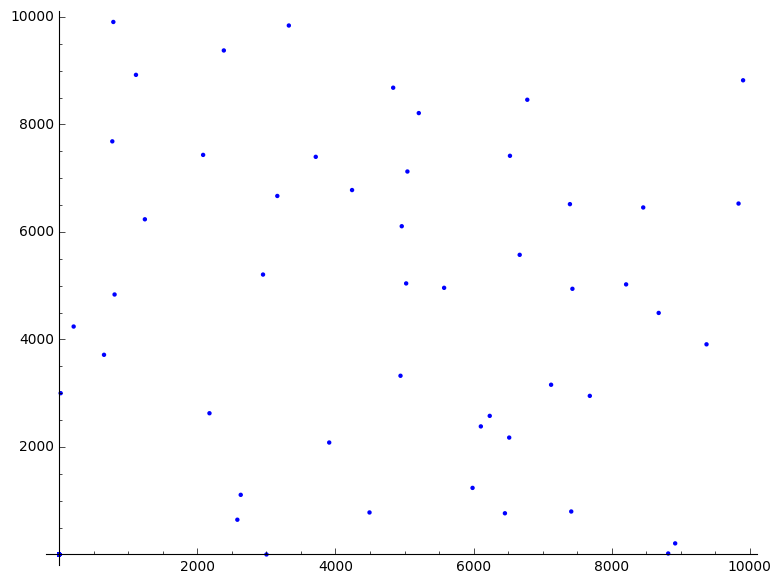

In [26]:
point(T)

In [29]:
points?
